# **Phishing Website Detection by Machine Learning Techniques —— CNN**

## **1. Objective:**
A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning model —— CNN on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. 

## **2. Loading Data:**

The features are extracted and store in the csv file. The working of this can be seen in the 'Phishing Website Detection_Feature Extraction.ipynb' file.

The reulted csv file is uploaded to this notebook and stored in the dataframe.

In [58]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
data0 = pd.read_csv('Datasets/5.URL10K.csv')

## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [60]:
#Checking the shape of the dataset
data0.shape

(10000, 18)

In [61]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [62]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

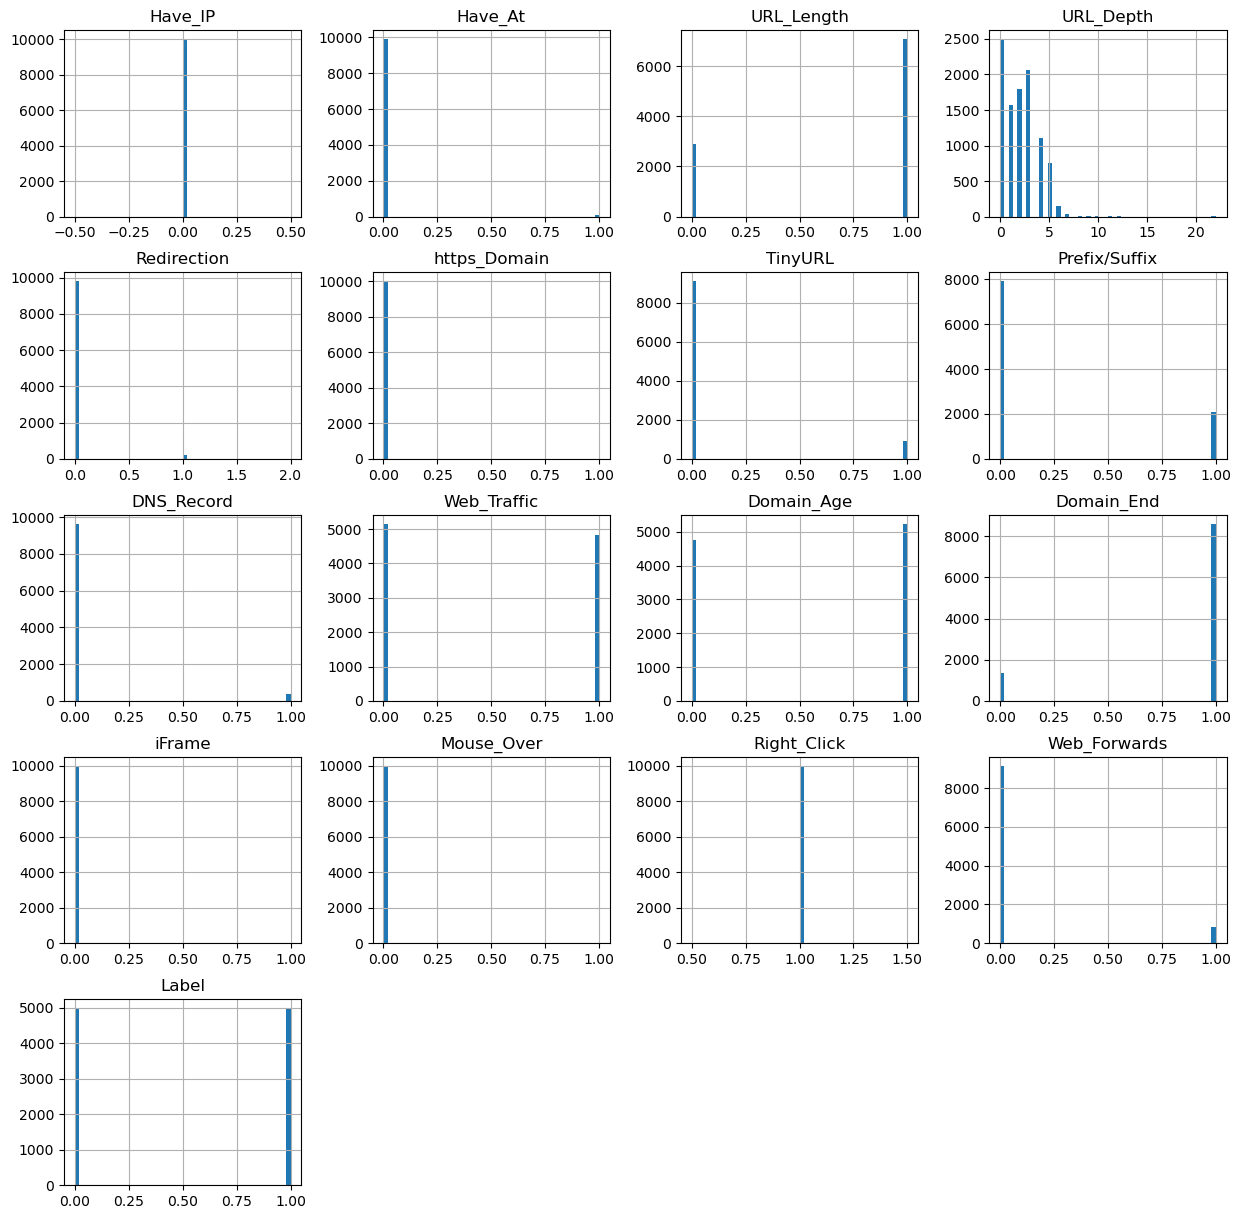

In [63]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

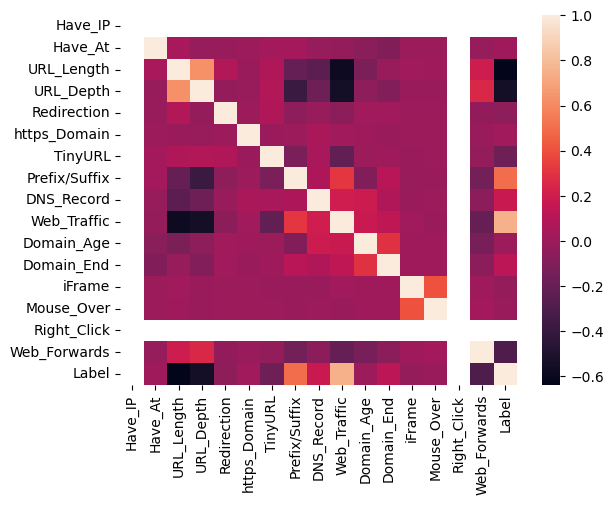

In [64]:
#Correlation heatmap
numeric_data = data0.select_dtypes(include='number')
sns.heatmap(numeric_data.corr())
plt.show()

## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [65]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.000000,10000.000000
mean,0.0,0.009500,0.708700,2.085900,0.020900,0.000400,0.089000,0.208400,0.0356,0.483600,0.524700,0.862100,0.000600,0.0001,1.0,0.083900,0.500000
std,0.0,0.097009,0.454384,1.715405,0.143754,0.019997,0.284758,0.406185,0.1853,0.499756,0.499415,0.344812,0.024489,0.0100,0.0,0.277252,0.500025
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,1.0,0.000000,0.000000
25%,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.0000,1.0,0.000000,0.000000
50%,0.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000,1.000000,0.000000,0.0000,1.0,0.000000,0.500000
75%,0.0,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0000,1.000000,1.000000,1.000000,0.000000,0.0000,1.0,0.000000,1.000000
max,0.0,1.000000,1.000000,22.000000,2.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.0000,1.0,1.000000,1.000000


In [66]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [67]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data. 

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [68]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,3,0,0,0,0,0,0,1,1,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0
3,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1
4,0,0,1,1,1,0,0,0,0,0,1,1,0,0,1,0,0


From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

In [69]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [70]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

## **6. Machine Learning Model & Training**

From the dataset above, it is clear that this is a supervised machine learning task.

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook is CNN.

In [71]:
print(X_train.shape)

(8000, 16)


In [72]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn import datasets

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, Dropout, MaxPool1D
import platform
import pickle

model=Sequential()

# Feature Learning Layers
model.add(Conv1D(32,kernel_size=3,activation='relu', input_shape=(16,1)))
model.add(Conv1D(32,kernel_size=3,activation='relu'))
model.add(MaxPool1D(pool_size=2))

model.add(Conv1D(64,kernel_size=3,activation='relu'))
model.add(Conv1D(64,kernel_size=3,activation='relu'))
model.add(MaxPool1D(pool_size=2))

model.add(Flatten())#Prepare for classification

#Classification Layers
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

#Check system os for optimisation in execution
if platform.system() == "Darwin" and platform.processor() == "arm":
    opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0015)
else:
    opt = tf.keras.optimizers.Adam(learning_rate=0.0015)
    
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [73]:
history = model.fit(X_train,y_train,batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20


200/200 [==============================] - 1s 2ms/step - loss: 0.2405 - accuracy: 0.9078 - val_loss: 0.1470 - val_accuracy: 0.9513
Epoch 2/20
200/200 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9527 - val_loss: 0.1511 - val_accuracy: 0.9388
Epoch 3/20
200/200 [==============================] - 0s 2ms/step - loss: 0.1185 - accuracy: 0.9597 - val_loss: 0.1330 - val_accuracy: 0.9331
Epoch 4/20
200/200 [==============================] - 0s 2ms/step - loss: 0.1078 - accuracy: 0.9611 - val_loss: 0.1084 - val_accuracy: 0.9575
Epoch 5/20
200/200 [==============================] - 0s 2ms/step - loss: 0.1041 - accuracy: 0.9620 - val_loss: 0.0985 - val_accuracy: 0.9581
Epoch 6/20
200/200 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.9636 - val_loss: 0.1097 - val_accuracy: 0.9619
Epoch 7/20
200/200 [==============================] - 0s 2ms/step - loss: 0.0949 - accuracy: 0.9642 - val_loss: 0.0939 - val_accuracy: 0.9613
Epoch 8/20
200/20

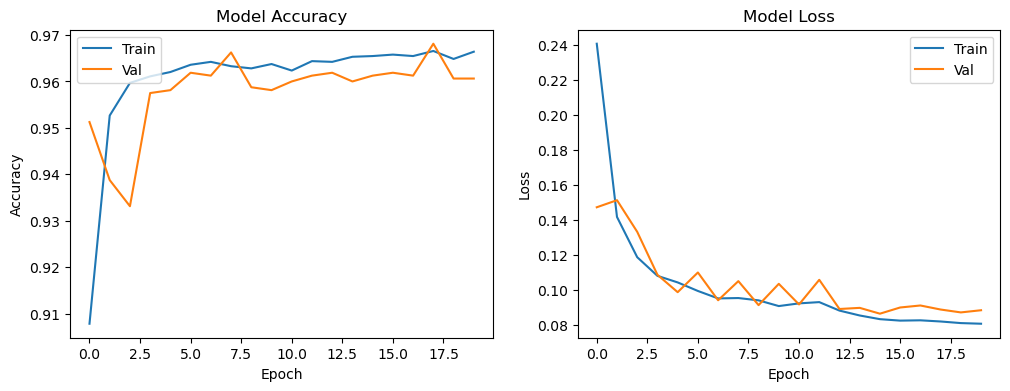

63/63 [==============================] - 0s 499us/step


In [74]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')

plt.show()

ypred_test = model.predict(X_test)

In [75]:
Ypred=np.zeros(len(ypred_test))
for i in range(len(ypred_test)):
    if ypred_test[i]>=0.5:
        Ypred[i]=1
    else:
        Ypred[i]=0

accuracy_score(y_test,Ypred) #accuracy score

0.967

## **7. Saving the model for future use**

In [76]:
# save the binary classification model as a pickle file
model_pkl_file = "Binary_Phishing_Detector.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)